### 1. 데이터 로드 및 전처리

In [1]:
import pandas as pd

# 파일 로드
train_data = pd.read_csv('train.csv')

# 데이터의 처음 몇 줄을 확인
train_data.head()

,SAMPLE_ID,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ATA,ID,BREADTH,BUILT,DEADWEIGHT,...,LENGTH,SHIPMANAGER,FLAG,U_WIND,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,PORT_SIZE,CI_HOUR
0,TRAIN_000000,SG,GIW5,Container,30.881018,2018-12-17 21:29,Z618338,30.0,24,24300,...,180.0,CQSB78,Panama,NaN,NaN,NaN,NaN,5,0.002615,3.450000
1,TRAIN_000001,IN,UJM2,Bulk,0.000000,2014-09-23 6:59,X886125,30.0,13,35900,...,180.0,SPNO34,Marshall Islands,NaN,NaN,NaN,NaN,12,0.000217,0.000000
2,TRAIN_000002,CN,EUC8,Container,0.000000,2015-02-03 22:00,T674582,50.0,12,146000,...,370.0,FNPK22,Malta,NaN,NaN,NaN,NaN,6,0.001614,0.000000
3,TRAIN_000003,JP,ZAG4,Container,0.000000,2020-01-17 4:02,Y847238,20.0,18,6910,...,120.0,PBZV77,Bahamas,-3.18,-1.61,6.7,2.629350,13,0.000356,0.000000
4,TRAIN_000004,SG,GIW5,Container,27.037650,2020-01-26 7:51,A872328,50.0,10,116000,...,300.0,GUCE76,Liberia,-0.33,-3.28,25.6,2.495953,15,0.002615,253.554444


In [66]:
import numpy as np
import pandas as pd

# ATA를 datetime 형식으로 변환
train_data['ATA'] = pd.to_datetime(train_data['ATA'])

# ATA를 분으로 변환하여 새로운 컬럼 추가
train_data['ATA_minutes'] = train_data['ATA'].dt.hour * 60 + train_data['ATA'].dt.minute

# 수치형 변수만 선택 (범주형 제외)
numeric_data = train_data.select_dtypes(include=[np.number])

# 각 통계 값 계산
min_vals = numeric_data.min()
max_vals = numeric_data.max()
mean_vals = numeric_data.mean()
median_vals = numeric_data.median()
std_vals = numeric_data.std()

# 결과를 하나의 데이터프레임으로 통합
summary_stats = pd.DataFrame({
    'Min': min_vals,
    'Max': max_vals,
    'Mean': mean_vals,
    'Median': median_vals,
    'Standard Deviation': std_vals
})

# 통계 결과 출력
summary_stats

,Min,Max,Mean,Median,Standard Deviation
DIST,0.000000,199.980651,19.328187,6.929678,30.930059
BREADTH,10.000000,60.000000,30.550010,30.000000,10.957070
BUILT,0.000000,80.000000,14.747989,13.000000,7.043988
DEADWEIGHT,100.000000,404000.000000,63577.506780,47400.000000,63515.531024
DEPTH,0.000000,30.000000,16.476177,20.000000,6.045930
DRAUGHT,0.000000,20.000000,11.088106,10.000000,4.599298
GT,150.000000,237000.000000,41348.968666,30700.000000,39304.543664
LENGTH,20.000000,400.000000,205.121320,190.000000,75.873891
U_WIND,-25.330000,17.910000,-0.294910,-0.130000,3.366585
V_WIND,-21.450000,29.690000,-0.263849,0.000000,3.736949


In [3]:
import numpy as np

# 수치형 변수만 선택 (범주형 제외)
numeric_data = train_data.select_dtypes(include=[np.number])

# 각 통계 값 계산
min_vals = numeric_data.min()
max_vals = numeric_data.max()
mean_vals = numeric_data.mean()
median_vals = numeric_data.median()
std_vals = numeric_data.std()

# 결과를 하나의 데이터프레임으로 통합
summary_stats = pd.DataFrame({
    'Min': min_vals,
    'Max': max_vals,
    'Mean': mean_vals,
    'Median': median_vals,
    'Standard Deviation': std_vals
})

# 통계 결과 출력
summary_stats

,Min,Max,Mean,Median,Standard Deviation
DIST,0.000000,199.980651,19.328187,6.929678,30.930059
BREADTH,10.000000,60.000000,30.550010,30.000000,10.957070
BUILT,0.000000,80.000000,14.747989,13.000000,7.043988
DEADWEIGHT,100.000000,404000.000000,63577.506780,47400.000000,63515.531024
DEPTH,0.000000,30.000000,16.476177,20.000000,6.045930
DRAUGHT,0.000000,20.000000,11.088106,10.000000,4.599298
GT,150.000000,237000.000000,41348.968666,30700.000000,39304.543664
LENGTH,20.000000,400.000000,205.121320,190.000000,75.873891
U_WIND,-25.330000,17.910000,-0.294910,-0.130000,3.366585
V_WIND,-21.450000,29.690000,-0.263849,0.000000,3.736949


- 결측치 확인

In [4]:
# 결측치 확인
missing_values = train_data.isnull().sum()
print("결측치 개수:\n", missing_values)

결측치 개수:
 SAMPLE_ID                  0
ARI_CO                     0
ARI_PO                     0
SHIP_TYPE_CATEGORY         0
DIST                       0
ATA                        0
ID                         0
BREADTH                    1
BUILT                      0
DEADWEIGHT                 0
DEPTH                      1
DRAUGHT                    1
GT                         0
LENGTH                     1
SHIPMANAGER                0
FLAG                       0
U_WIND                163688
V_WIND                163688
AIR_TEMPERATURE       164630
BN                    163688
ATA_LT                     0
PORT_SIZE                  0
CI_HOUR                    0
dtype: int64


In [5]:
# 전체 데이터에서 결측치가 있는 열 비율 확인
missing_percentage = (train_data.isnull().sum() / len(train_data)) * 100
print("\n열별 결측치 비율(%):\n", missing_percentage)


열별 결측치 비율(%):
 SAMPLE_ID              0.000000
ARI_CO                 0.000000
ARI_PO                 0.000000
SHIP_TYPE_CATEGORY     0.000000
DIST                   0.000000
ATA                    0.000000
ID                     0.000000
BREADTH                0.000255
BUILT                  0.000000
DEADWEIGHT             0.000000
DEPTH                  0.000255
DRAUGHT                0.000255
GT                     0.000000
LENGTH                 0.000255
SHIPMANAGER            0.000000
FLAG                   0.000000
U_WIND                41.763642
V_WIND                41.763642
AIR_TEMPERATURE       42.003985
BN                    41.763642
ATA_LT                 0.000000
PORT_SIZE              0.000000
CI_HOUR                0.000000
dtype: float64


- 결측치 제거

In [6]:
# 결측치 제거 (결측치가 있는 모든 행 제거)
train_data_cleaned = train_data.dropna()

# 결측치 제거 후 데이터 확인
print("\n결측치 제거 후 데이터 크기:", train_data_cleaned.shape)


결측치 제거 후 데이터 크기: (227308, 23)


In [7]:
# 결측치 확인
train_data_cleaned_missing_values = train_data_cleaned.isnull().sum()
print("결측치 개수:\n", train_data_cleaned_missing_values)

결측치 개수:
 SAMPLE_ID             0
ARI_CO                0
ARI_PO                0
SHIP_TYPE_CATEGORY    0
DIST                  0
ATA                   0
ID                    0
BREADTH               0
BUILT                 0
DEADWEIGHT            0
DEPTH                 0
DRAUGHT               0
GT                    0
LENGTH                0
SHIPMANAGER           0
FLAG                  0
U_WIND                0
V_WIND                0
AIR_TEMPERATURE       0
BN                    0
ATA_LT                0
PORT_SIZE             0
CI_HOUR               0
dtype: int64


- 범주형 변수 확인

In [8]:
# train_data_cleaned_missing_values가 DataFrame이 맞는지 확인
print(type(train_data_cleaned_missing_values))  # DataFrame이 아니면 문제가 있음

# 데이터프레임에서 범주형 변수 추출 (train_data를 사용)
categorical_columns = train_data_cleaned.select_dtypes(include=['object']).columns
print("\n범주형 변수:\n", categorical_columns)

<class 'pandas.core.series.Series'>

범주형 변수:
 Index(['SAMPLE_ID', 'ARI_CO', 'ARI_PO', 'SHIP_TYPE_CATEGORY', 'ATA', 'ID',
       'SHIPMANAGER', 'FLAG'],
      dtype='object')


- 레이블 인코딩(Label Encoding)

In [9]:
from sklearn.preprocessing import LabelEncoder

# 레이블 인코더 객체 생성
label_encoder = LabelEncoder()

# 범주형 변수를 수치형으로 변환
for col in categorical_columns:
    train_data_cleaned[col] = label_encoder.fit_transform(train_data_cleaned[col])

# 변환된 데이터 확인
print(train_data_cleaned.head())

C:\Users\Choeminhwa\AppData\Local\Temp\ipykernel_5776\735586701.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_cleaned[col] = label_encoder.fit_transform(train_data_cleaned[col])
C:\Users\Choeminhwa\AppData\Local\Temp\ipykernel_5776\735586701.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_cleaned[col] = label_encoder.fit_transform(train_data_cleaned[col])
C:\Users\Choeminhwa\AppData\Local\Temp\ipykernel_5776\735586701.py:8: SettingWithCopyWarning: 
A value is trying to be set

    SAMPLE_ID  ARI_CO  ARI_PO  SHIP_TYPE_CATEGORY       DIST     ATA     ID  \
3           0       8     100                   2   0.000000   38335  22780   
4           1      17      21                   2  27.037650   39108    860   
5           2       0      90                   0  49.953585   85757  17103   
7           3      19      35                   1   0.000000  172683  12308   
10          4       4      84                   0  18.022495  116774  18525   

    BREADTH  BUILT  DEADWEIGHT  ...  LENGTH  SHIPMANAGER  FLAG  U_WIND  \
3      20.0     18        6910  ...   120.0         3630     4   -3.18   
4      50.0     10      116000  ...   300.0         1610    63   -0.33   
5      40.0      7      183000  ...   290.0         1927    55    6.10   
7      30.0     18       46600  ...   200.0         1044    46    2.82   
10     30.0     11       35000  ...   180.0         2508    72   -2.16   

    V_WIND  AIR_TEMPERATURE        BN  ATA_LT  PORT_SIZE     CI_HOUR  
3    -1.6

- 이상치 정의 및 제거

In [10]:
# IQR을 사용하여 이상치 필터링하는 함수
def filter_outliers(df, column):
    # 1사분위수 (Q1)와 3사분위수 (Q3) 계산
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    # IQR 계산
    IQR = Q3 - Q1
    
    # 이상치 기준
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 이상치가 아닌 데이터만 필터링
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df

# 수치형 변수에 대해 이상치를 제거
numerical_columns = train_data_cleaned.select_dtypes(include=['float64', 'int64']).columns

# 모든 수치형 변수에 대해 이상치 제거
filtered_data = train_data_cleaned.copy()  # 원본 데이터를 유지하기 위해 복사
for col in numerical_columns:
    filtered_data = filter_outliers(filtered_data, col)

# 필터링된 데이터의 정보 출력
print(filtered_data.info())
print(filtered_data.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 121402 entries, 3 to 391929
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   SAMPLE_ID           121402 non-null  int32  
 1   ARI_CO              121402 non-null  int32  
 2   ARI_PO              121402 non-null  int32  
 3   SHIP_TYPE_CATEGORY  121402 non-null  int32  
 4   DIST                121402 non-null  float64
 5   ATA                 121402 non-null  int32  
 6   ID                  121402 non-null  int32  
 7   BREADTH             121402 non-null  float64
 8   BUILT               121402 non-null  int64  
 9   DEADWEIGHT          121402 non-null  int64  
 10  DEPTH               121402 non-null  float64
 11  DRAUGHT             121402 non-null  float64
 12  GT                  121402 non-null  int64  
 13  LENGTH              121402 non-null  float64
 14  SHIPMANAGER         121402 non-null  int32  
 15  FLAG                121402 non-null  in

In [11]:
# 필터링 전 데이터 크기
print("필터링 전 데이터 크기:", train_data_cleaned.shape)

# 수치형 변수에 대해 이상치를 제거
numerical_columns = train_data_cleaned.select_dtypes(include=['float64', 'int64']).columns

# 모든 수치형 변수에 대해 이상치 제거
filtered_data = train_data_cleaned.copy()  # 원본 데이터를 유지하기 위해 복사
for col in numerical_columns:
    filtered_data = filter_outliers(filtered_data, col)

# 필터링 후 데이터 크기
print("필터링 후 데이터 크기:", filtered_data.shape)

# 필터링 전후 주요 통계 정보 비교
print("\n=== 필터링 전 데이터 통계 ===")
print(train_data_cleaned[numerical_columns].describe())

print("\n=== 필터링 후 데이터 통계 ===")
print(filtered_data[numerical_columns].describe())

# 필터링 전후 각 열의 데이터 차이 확인
print("\n=== 필터링된 데이터에서 제외된 행 개수 ===")
print(train_data_cleaned.shape[0] - filtered_data.shape[0])

필터링 전 데이터 크기: (227308, 23)
필터링 후 데이터 크기: (121402, 23)

=== 필터링 전 데이터 통계 ===
                DIST        BREADTH          BUILT     DEADWEIGHT  \
count  227308.000000  227308.000000  227308.000000  227308.000000   
mean       19.463374      28.997308      14.133761   57710.912506   
std        30.962808      11.443534       7.324446   63190.017262   
min         0.000000      10.000000       0.000000     100.000000   
25%         0.000000      20.000000       9.000000   12000.000000   
50%         7.355653      30.000000      13.000000   37400.000000   
75%        25.572624      30.000000      18.000000   76000.000000   
max       199.980651      60.000000      80.000000  404000.000000   

               DEPTH        DRAUGHT             GT         LENGTH  \
count  227308.000000  227308.000000  227308.000000  227308.000000   
mean       15.743353      10.564872   37324.344414     192.683628   
std         6.240602       4.812685   39225.342737      78.650428   
min         0.000000      

- X, Y 분리

In [12]:
filtered_data

,SAMPLE_ID,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ATA,ID,BREADTH,BUILT,DEADWEIGHT,...,LENGTH,SHIPMANAGER,FLAG,U_WIND,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,PORT_SIZE,CI_HOUR
3,0,8,100,2,0.000000,38335,22780,20.0,18,6910,...,120.0,3630,4,-3.18,-1.61,6.7,2.629350,13,0.000356,0.000000
7,3,19,35,1,0.000000,172683,12308,30.0,18,46600,...,200.0,1044,46,2.82,0.25,28.6,2.255079,18,0.000990,0.000000
10,4,4,84,0,18.022495,116774,18525,30.0,11,35000,...,180.0,2508,72,-2.16,1.50,25.6,2.146870,10,0.000520,2.721944
13,5,4,73,0,21.887307,95535,16242,40.0,9,70400,...,220.0,1879,46,-4.88,1.55,21.9,3.347518,5,0.000455,7.374722
15,6,4,62,1,0.000000,91604,10171,20.0,17,13600,...,130.0,2472,81,-0.52,4.15,10.5,2.925161,23,0.000595,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391916,227298,4,45,2,0.000000,90601,14769,40.0,11,61600,...,250.0,4077,46,-3.25,-1.83,17.6,2.710105,11,0.001743,0.000000
391917,227299,9,68,1,0.000000,148228,16529,20.0,3,5100,...,100.0,4734,9,-0.26,0.80,16.1,1.004134,3,0.000149,0.000000
391919,227300,4,14,2,59.226456,80252,3612,20.0,23,12600,...,140.0,832,46,-1.98,-3.53,6.8,2.861839,20,0.001614,14.551111
391922,227301,0,0,0,47.267555,118219,22146,40.0,13,91900,...,230.0,5469,25,-2.23,-1.39,17.1,2.145773,1,0.000113,81.266944


In [13]:
# X, Y 분리 (여기서는 'Y'를 타겟 변수로 'best' 컬럼을 가정)
X = filtered_data.drop(columns=['CI_HOUR'])  # 타겟 변수 제외
Y = filtered_data['CI_HOUR']  # 타겟 변수

- MinMaxScaler() 데이터 정규화

In [14]:
from sklearn.preprocessing import MinMaxScaler

# 수치형 변수만 선택
numerical_columns = X.columns

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# 수치형 변수에 대해 스케일링 수행
filtered_data[numerical_columns] = scaler.fit_transform(filtered_data[numerical_columns])

# 정규화된 데이터 확인
filtered_data[numerical_columns].head()

,SAMPLE_ID,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ATA,ID,BREADTH,BUILT,DEADWEIGHT,...,GT,LENGTH,SHIPMANAGER,FLAG,U_WIND,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,PORT_SIZE
3,0.000000,0.333333,0.990099,0.666667,0.000000,0.197408,0.961099,0.333333,0.56250,0.050961,...,0.060494,0.259259,0.579527,0.034483,0.303729,0.414577,0.292388,0.462864,0.565217,0.134672
7,0.000013,0.791667,0.346535,0.333333,0.000000,0.891796,0.519261,0.666667,0.56250,0.378247,...,0.361728,0.555556,0.166560,0.396552,0.710508,0.523032,0.671280,0.396978,0.782609,0.377319
10,0.000018,0.166667,0.831683,0.000000,0.281909,0.602826,0.781570,0.666667,0.34375,0.282593,...,0.271605,0.481481,0.400351,0.620690,0.372881,0.595918,0.619377,0.377929,0.434783,0.197390
13,0.000022,0.166667,0.722772,0.000000,0.342362,0.493051,0.685245,1.000000,0.28125,0.574503,...,0.667901,0.629630,0.299904,0.396552,0.188475,0.598834,0.555363,0.589288,0.217391,0.172713
15,0.000026,0.166667,0.613861,0.333333,0.000000,0.472733,0.429096,0.333333,0.53125,0.106127,...,0.106049,0.296296,0.394602,0.698276,0.484068,0.750437,0.358131,0.514937,1.000000,0.226047


In [15]:
filtered_data

,SAMPLE_ID,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ATA,ID,BREADTH,BUILT,DEADWEIGHT,...,LENGTH,SHIPMANAGER,FLAG,U_WIND,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,PORT_SIZE,CI_HOUR
3,0.000000,0.333333,0.990099,0.666667,0.000000,0.197408,0.961099,0.333333,0.56250,0.050961,...,0.259259,0.579527,0.034483,0.303729,0.414577,0.292388,0.462864,0.565217,0.134672,0.000000
7,0.000013,0.791667,0.346535,0.333333,0.000000,0.891796,0.519261,0.666667,0.56250,0.378247,...,0.555556,0.166560,0.396552,0.710508,0.523032,0.671280,0.396978,0.782609,0.377319,0.000000
10,0.000018,0.166667,0.831683,0.000000,0.281909,0.602826,0.781570,0.666667,0.34375,0.282593,...,0.481481,0.400351,0.620690,0.372881,0.595918,0.619377,0.377929,0.434783,0.197390,2.721944
13,0.000022,0.166667,0.722772,0.000000,0.342362,0.493051,0.685245,1.000000,0.28125,0.574503,...,0.629630,0.299904,0.396552,0.188475,0.598834,0.555363,0.589288,0.217391,0.172713,7.374722
15,0.000026,0.166667,0.613861,0.333333,0.000000,0.472733,0.429096,0.333333,0.53125,0.106127,...,0.296296,0.394602,0.698276,0.484068,0.750437,0.358131,0.514937,1.000000,0.226047,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391916,0.999974,0.166667,0.445545,0.666667,0.000000,0.467549,0.623096,1.000000,0.34375,0.501938,...,0.740741,0.650910,0.396552,0.298983,0.401749,0.480969,0.477080,0.478261,0.665804,0.000000
391917,0.999978,0.375000,0.673267,0.333333,0.000000,0.765398,0.697355,0.333333,0.09375,0.036035,...,0.185185,0.755829,0.077586,0.501695,0.555102,0.455017,0.176765,0.130435,0.055272,0.000000
391919,0.999982,0.166667,0.138614,0.666667,0.926423,0.414060,0.152356,0.333333,0.71875,0.097881,...,0.333333,0.132705,0.396552,0.385085,0.302624,0.294118,0.503791,0.869565,0.616515,14.551111
391922,0.999987,0.000000,0.000000,0.000000,0.739361,0.610295,0.934349,1.000000,0.40625,0.751794,...,0.666667,0.873203,0.215517,0.368136,0.427405,0.472318,0.377736,0.043478,0.041626,81.266944


### 2. Feature Selection

In [16]:
correlation_matrix = filtered_data.corr()
print(correlation_matrix['CI_HOUR'].sort_values(ascending=False))

CI_HOUR               1.000000
DIST                  0.527794
DEADWEIGHT            0.112178
DEPTH                 0.072632
ATA                   0.047603
V_WIND                0.042166
GT                    0.033672
SHIPMANAGER           0.020007
BREADTH               0.018692
PORT_SIZE             0.016003
BN                    0.011645
AIR_TEMPERATURE       0.006511
ID                    0.002407
ARI_PO                0.002066
ATA_LT                0.000574
SAMPLE_ID             0.000043
U_WIND               -0.008763
LENGTH               -0.015917
FLAG                 -0.018321
BUILT                -0.020367
ARI_CO               -0.049865
SHIP_TYPE_CATEGORY   -0.159816
DRAUGHT                    NaN
Name: CI_HOUR, dtype: float64


- SHAP

1) XGBoost

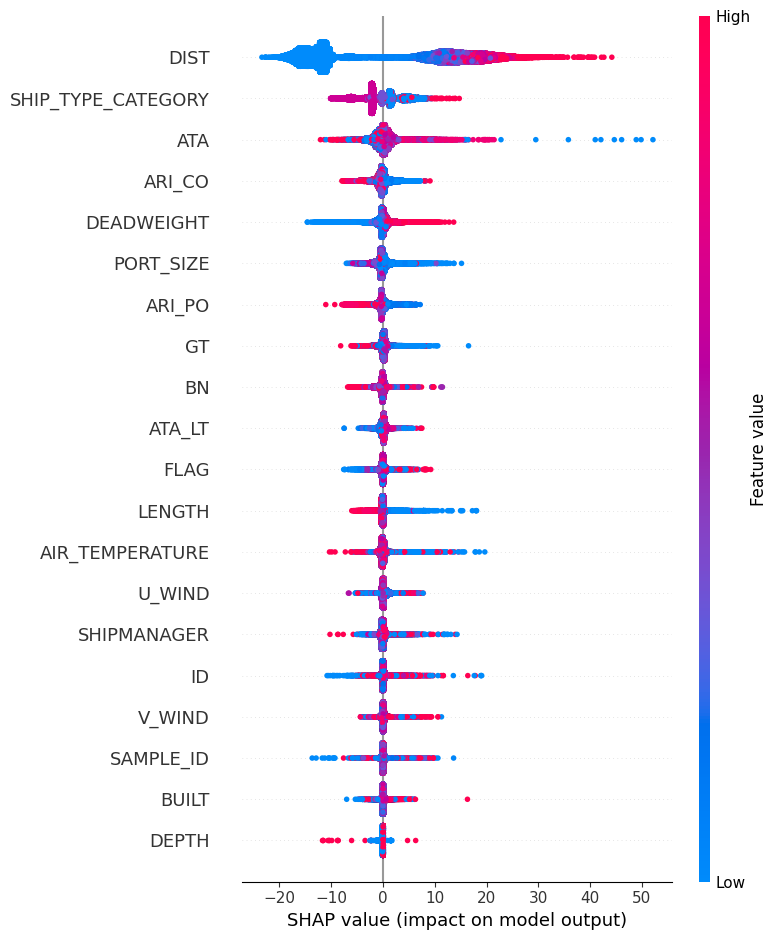


특징 중요성 (SHAP 값 기준):
               Feature  SHAP Value
4                 DIST   14.035408
3   SHIP_TYPE_CATEGORY    2.818949
5                  ATA    1.143533
1               ARI_CO    0.882581
9           DEADWEIGHT    0.849635
21           PORT_SIZE    0.783549
2               ARI_PO    0.728045
12                  GT    0.434727
19                  BN    0.379967
20              ATA_LT    0.368567
15                FLAG    0.363641
13              LENGTH    0.349745
18     AIR_TEMPERATURE    0.313204
16              U_WIND    0.280085
14         SHIPMANAGER    0.275738
6                   ID    0.217237
17              V_WIND    0.208770
0            SAMPLE_ID    0.201058
8                BUILT    0.147014
10               DEPTH    0.057576
7              BREADTH    0.038559
11             DRAUGHT    0.000000


In [17]:
import shap
import xgboost as xgb
import pandas as pd
import numpy as np  # NumPy 라이브러리 import 추가

# XGBoost 모델 생성
model = xgb.XGBRegressor()  # 회귀 문제인 경우 XGBRegressor, 분류 문제는 XGBClassifier 사용
model.fit(filtered_data[numerical_columns], Y)

# SHAP 값 계산
explainer = shap.Explainer(model)
shap_values = explainer(filtered_data[numerical_columns])

# SHAP 값 시각화
shap.summary_plot(shap_values, filtered_data[numerical_columns])

# SHAP 값으로 특징 중요성 확인
feature_importance = pd.DataFrame({'Feature': filtered_data[numerical_columns].columns, 'SHAP Value': np.abs(shap_values.values).mean(axis=0)})
feature_importance = feature_importance.sort_values(by='SHAP Value', ascending=False)

print("\n특징 중요성 (SHAP 값 기준):")
print(feature_importance)

In [18]:
mean_shap_value = feature_importance['SHAP Value'].mean()
selected_features = feature_importance[feature_importance['SHAP Value'] > mean_shap_value]
print(selected_features)

              Feature  SHAP Value
4                DIST   14.035408
3  SHIP_TYPE_CATEGORY    2.818949
5                 ATA    1.143533


In [48]:
# 상위 5개 특징 선택
xgb_top_n_features = feature_importance.head(10)
print(xgb_top_n_features)

               Feature  SHAP Value
4                 DIST   14.035408
3   SHIP_TYPE_CATEGORY    2.818949
5                  ATA    1.143533
1               ARI_CO    0.882581
9           DEADWEIGHT    0.849635
21           PORT_SIZE    0.783549
2               ARI_PO    0.728045
12                  GT    0.434727
19                  BN    0.379967
20              ATA_LT    0.368567


2. lightgbm

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006974 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3216
[LightGBM] [Info] Number of data points in the train set: 121402, number of used features: 21
[LightGBM] [Info] Start training from score 14.689339


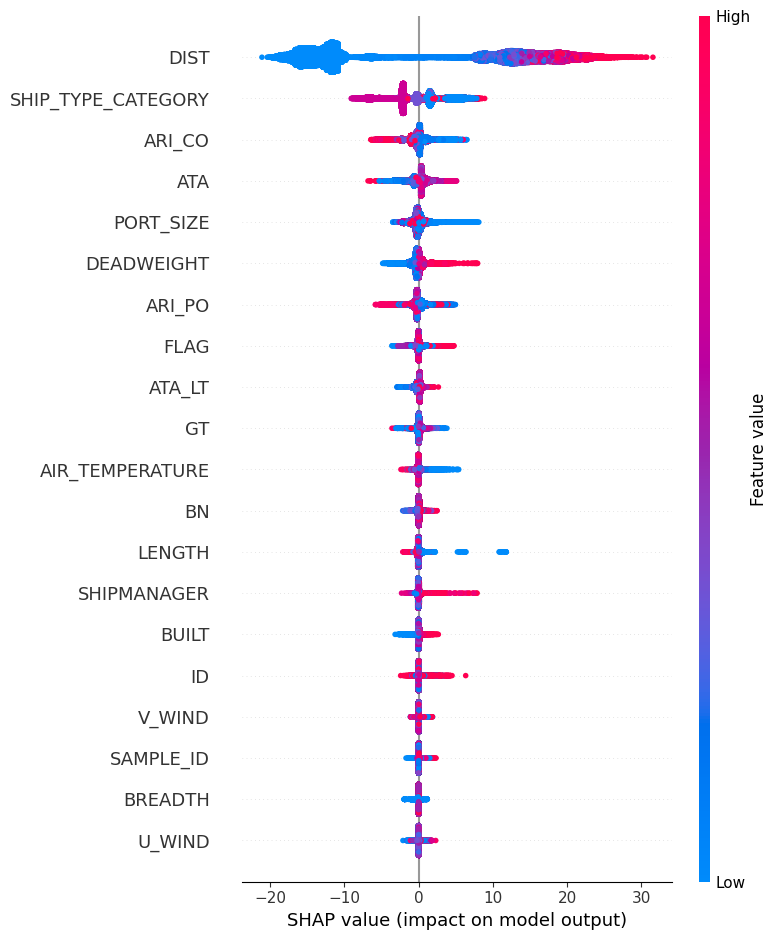


LightGBM 특징 중요성 (SHAP 값 기준):
               Feature  SHAP Value
4                 DIST   14.122121
3   SHIP_TYPE_CATEGORY    2.924151
1               ARI_CO    0.849822
5                  ATA    0.789727
21           PORT_SIZE    0.580514
9           DEADWEIGHT    0.553923
2               ARI_PO    0.541431
15                FLAG    0.267943
20              ATA_LT    0.261252
12                  GT    0.200225
18     AIR_TEMPERATURE    0.171168
19                  BN    0.129854
13              LENGTH    0.121363
14         SHIPMANAGER    0.105896
8                BUILT    0.084344
6                   ID    0.069922
17              V_WIND    0.050944
0            SAMPLE_ID    0.050698
7              BREADTH    0.048366
16              U_WIND    0.046937
10               DEPTH    0.000229
11             DRAUGHT    0.000000


In [20]:
import lightgbm as lgb

# LightGBM 모델 생성
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(filtered_data[numerical_columns], Y)

# SHAP 값 계산
lgb_explainer = shap.Explainer(lgb_model)
lgb_shap_values = lgb_explainer(filtered_data[numerical_columns])

# SHAP 값 시각화
shap.summary_plot(lgb_shap_values, filtered_data[numerical_columns])

# SHAP 값으로 특징 중요성 확인
lgb_feature_importance = pd.DataFrame({'Feature': filtered_data[numerical_columns].columns, 'SHAP Value': np.abs(lgb_shap_values.values).mean(axis=0)})
lgb_feature_importance = lgb_feature_importance.sort_values(by='SHAP Value', ascending=False)

print("\nLightGBM 특징 중요성 (SHAP 값 기준):")
print(lgb_feature_importance)

In [21]:
mean_shap_value = lgb_feature_importance['SHAP Value'].mean()
selected_features = lgb_feature_importance[lgb_feature_importance['SHAP Value'] > mean_shap_value]
print(selected_features)

              Feature  SHAP Value
4                DIST   14.122121
3  SHIP_TYPE_CATEGORY    2.924151


In [22]:
# 상위 10개 특징 선택
top_n_features = lgb_feature_importance.head(10)
print(top_n_features)

               Feature  SHAP Value
4                 DIST   14.122121
3   SHIP_TYPE_CATEGORY    2.924151
1               ARI_CO    0.849822
5                  ATA    0.789727
21           PORT_SIZE    0.580514
9           DEADWEIGHT    0.553923
2               ARI_PO    0.541431
15                FLAG    0.267943
20              ATA_LT    0.261252
12                  GT    0.200225


3. Catboost regressor

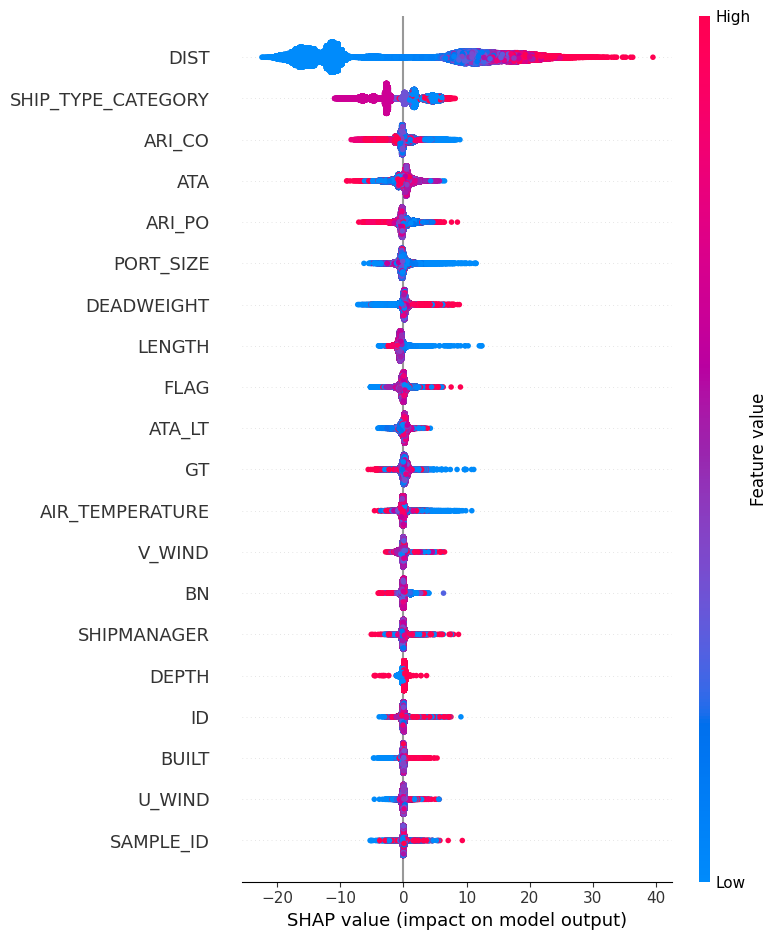


CatBoost 특징 중요성 (SHAP 값 기준):
               Feature  SHAP Value
4                 DIST   13.630610
3   SHIP_TYPE_CATEGORY    3.202237
1               ARI_CO    0.980786
5                  ATA    0.932612
2               ARI_PO    0.691106
21           PORT_SIZE    0.636735
9           DEADWEIGHT    0.499338
13              LENGTH    0.491216
15                FLAG    0.411069
20              ATA_LT    0.396218
12                  GT    0.386519
18     AIR_TEMPERATURE    0.301805
17              V_WIND    0.278662
19                  BN    0.273184
14         SHIPMANAGER    0.221239
10               DEPTH    0.204120
6                   ID    0.186106
8                BUILT    0.173374
16              U_WIND    0.167524
0            SAMPLE_ID    0.157542
7              BREADTH    0.132234
11             DRAUGHT    0.000000


In [23]:
from catboost import CatBoostRegressor

# CatBoost 모델 생성
cat_model = CatBoostRegressor(verbose=0)
cat_model.fit(filtered_data[numerical_columns], Y)

# SHAP 값 계산
cat_explainer = shap.Explainer(cat_model)
cat_shap_values = cat_explainer(filtered_data[numerical_columns])

# SHAP 값 시각화
shap.summary_plot(cat_shap_values, filtered_data[numerical_columns])

# SHAP 값으로 특징 중요성 확인
cat_feature_importance = pd.DataFrame({'Feature': filtered_data[numerical_columns].columns, 'SHAP Value': np.abs(cat_shap_values.values).mean(axis=0)})
cat_feature_importance = cat_feature_importance.sort_values(by='SHAP Value', ascending=False)

print("\nCatBoost 특징 중요성 (SHAP 값 기준):")
print(cat_feature_importance)

In [24]:
# 상위 5개 특징 선택
top_n_features = cat_feature_importance.head(10)
print(top_n_features)

               Feature  SHAP Value
4                 DIST   13.630610
3   SHIP_TYPE_CATEGORY    3.202237
1               ARI_CO    0.980786
5                  ATA    0.932612
2               ARI_PO    0.691106
21           PORT_SIZE    0.636735
9           DEADWEIGHT    0.499338
13              LENGTH    0.491216
15                FLAG    0.411069
20              ATA_LT    0.396218


4. linear regression

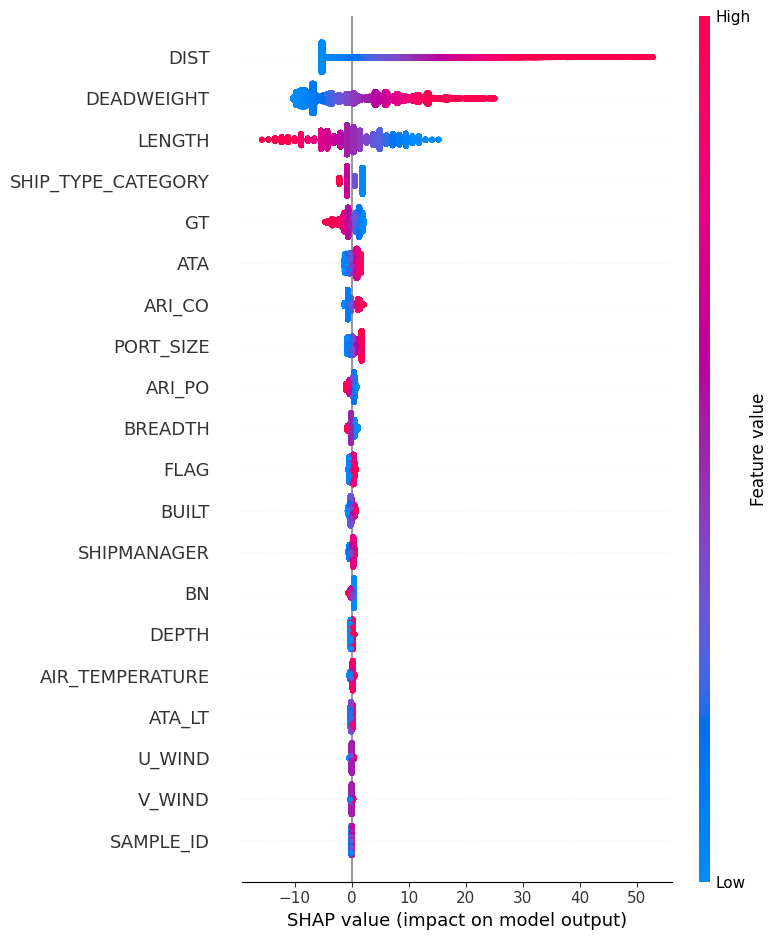


Linear Regression 특징 중요성 (SHAP 값 기준):
               Feature  SHAP Value
4                 DIST    8.608354
9           DEADWEIGHT    6.722051
13              LENGTH    4.903065
3   SHIP_TYPE_CATEGORY    1.274935
12                  GT    1.219002
5                  ATA    0.747156
1               ARI_CO    0.743445
21           PORT_SIZE    0.668120
2               ARI_PO    0.422036
7              BREADTH    0.325591
15                FLAG    0.263670
8                BUILT    0.261119
14         SHIPMANAGER    0.254153
19                  BN    0.178567
10               DEPTH    0.168413
18     AIR_TEMPERATURE    0.158228
20              ATA_LT    0.128301
16              U_WIND    0.125789
17              V_WIND    0.087615
0            SAMPLE_ID    0.023956
6                   ID    0.013859
11             DRAUGHT    0.000000


In [25]:
from sklearn.linear_model import LinearRegression
import shap

# Linear Regression 모델 생성
lin_reg_model = LinearRegression()
lin_reg_model.fit(filtered_data[numerical_columns], Y)

# SHAP 값 계산 (LinearExplainer 사용)
lin_reg_explainer = shap.LinearExplainer(lin_reg_model, filtered_data[numerical_columns])
lin_reg_shap_values = lin_reg_explainer.shap_values(filtered_data[numerical_columns])

# SHAP 값 시각화
shap.summary_plot(lin_reg_shap_values, filtered_data[numerical_columns])

# SHAP 값으로 특징 중요성 확인
lin_reg_feature_importance = pd.DataFrame({'Feature': filtered_data[numerical_columns].columns, 'SHAP Value': np.abs(lin_reg_shap_values).mean(axis=0)})
lin_reg_feature_importance = lin_reg_feature_importance.sort_values(by='SHAP Value', ascending=False)

print("\nLinear Regression 특징 중요성 (SHAP 값 기준):")
print(lin_reg_feature_importance)

In [26]:
# 상위 10개 특징 선택
top_n_features = lin_reg_feature_importance.head(10)
print(top_n_features)

               Feature  SHAP Value
4                 DIST    8.608354
9           DEADWEIGHT    6.722051
13              LENGTH    4.903065
3   SHIP_TYPE_CATEGORY    1.274935
12                  GT    1.219002
5                  ATA    0.747156
1               ARI_CO    0.743445
21           PORT_SIZE    0.668120
2               ARI_PO    0.422036
7              BREADTH    0.325591


5. Random Forest

In [ ]:
import shap
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Random Forest 모델 생성 및 학습
rf_model = RandomForestRegressor()
rf_model.fit(filtered_data[numerical_columns], Y)

# SHAP 값 계산 (TreeExplainer 사용)
rf_explainer = shap.TreeExplainer(rf_model)
rf_shap_values = rf_explainer.shap_values(filtered_data[numerical_columns])

# 회귀 모델인 경우, shap_values는 하나의 배열로 반환되므로 직접 사용
# SHAP 값 시각화
shap.summary_plot(rf_shap_values, filtered_data[numerical_columns])

# SHAP 값으로 특징 중요성 확인
rf_feature_importance = pd.DataFrame({
    'Feature': filtered_data[numerical_columns].columns,
    'SHAP Value': np.abs(rf_shap_values).mean(axis=0)  # 절대값의 평균으로 중요도 계산
})
rf_feature_importance = rf_feature_importance.sort_values(by='SHAP Value', ascending=False)

# 결과 출력
print("\nRandom Forest 특징 중요성 (SHAP 값 기준):")
print(rf_feature_importance)

### 3. 모델 학습 및 검증

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt

In [49]:
top_n_features_list = xgb_top_n_features['Feature'][:7].tolist()
filtered_data[top_n_features_list]

,DIST,SHIP_TYPE_CATEGORY,ATA,ARI_CO,DEADWEIGHT,PORT_SIZE,ARI_PO
3,0.000000,0.666667,0.197408,0.333333,0.050961,0.134672,0.990099
7,0.000000,0.333333,0.891796,0.791667,0.378247,0.377319,0.346535
10,0.281909,0.000000,0.602826,0.166667,0.282593,0.197390,0.831683
13,0.342362,0.000000,0.493051,0.166667,0.574503,0.172713,0.722772
15,0.000000,0.333333,0.472733,0.166667,0.106127,0.226047,0.613861
...,...,...,...,...,...,...,...
391916,0.000000,0.666667,0.467549,0.166667,0.501938,0.665804,0.445545
391917,0.000000,0.333333,0.765398,0.375000,0.036035,0.055272,0.673267
391919,0.926423,0.666667,0.414060,0.166667,0.097881,0.616515,0.138614
391922,0.739361,0.000000,0.610295,0.000000,0.751794,0.041626,0.000000


In [50]:
# X, Y 분리
X = filtered_data[top_n_features_list]  # 타겟 변수를 제외한 특징
Y = Y  # 타겟 변수

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [51]:
# 모델 리스트 생성
models = {
    "LR": LinearRegression(),
    "RFR": RandomForestRegressor(),
    "XGBR": xgb.XGBRegressor(),
    "LGBR": lgb.LGBMRegressor(),
    "CBR": CatBoostRegressor(verbose=0)
}

In [52]:
# 성능 평가를 위한 리스트 초기화
results = []
rmse_list = []

# 각 모델에 대해 성능 평가
for model_name, model in models.items():
    # 5-fold 교차검증을 통한 RMSE, MSE, R2 계산
    rmse_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
    mse_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    r2_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    
    # 평균 및 표준편차 계산
    rmse_mean = -rmse_scores.mean()
    rmse_std = rmse_scores.std()
    
    # 결과 저장
    results.append({
        'Model': model_name,
        'RMSE Mean': rmse_mean,
        'RMSE Std': rmse_std,
        'MSE Mean': -mse_scores.mean(),
        'R2 Mean': r2_scores.mean()
    })
    
    # RMSE 리스트 저장 (박스플롯 시각화를 위해)
    rmse_list.append(-rmse_scores)

# 결과 데이터프레임 생성
results_df = pd.DataFrame(results)

# 성능 평가 결과 출력
results_df

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000520 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 992
[LightGBM] [Info] Number of data points in the train set: 77696, number of used features: 7
[LightGBM] [Info] Start training from score 14.718501
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000553 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 993
[LightGBM] [Info] Number of data points in the train set: 77697, number of used features: 7
[LightGBM] [Info] Start training from score 14.706721
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000395 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

,Model,RMSE Mean,RMSE Std,MSE Mean,R2 Mean
0,LR,20.049766,0.182974,402.026595,0.296845
1,RFR,16.982843,0.142281,288.462192,0.495139
2,XGBR,16.619538,0.182297,276.242265,0.516859
3,LGBR,16.700825,0.180893,278.950289,0.512135
4,CBR,16.665523,0.181811,277.772699,0.514188


In [53]:
# 폰트 크기 설정
plt.rc('font', size=20)         # 기본 폰트 크기
plt.rc('axes', titlesize=20)     # 제목 폰트 크기
plt.rc('axes', labelsize=20)     # 축 제목 폰트 크기
plt.rc('xtick', labelsize=20)    # x축 값 폰트 크기
plt.rc('ytick', labelsize=20)    # y축 값 폰트 크기
plt.rc('legend', fontsize=20)    # 범례 폰트 크기
plt.rc('figure', titlesize=20)   # Figure 제목 폰트 크기

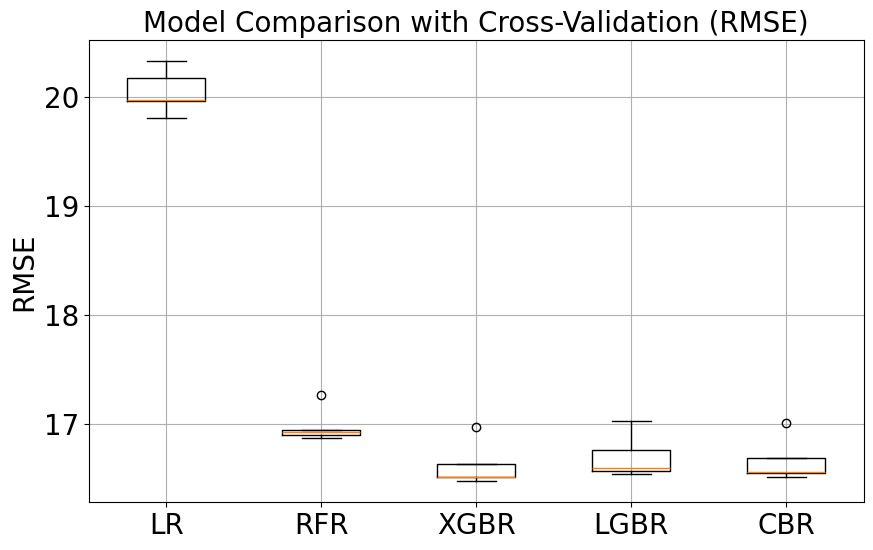

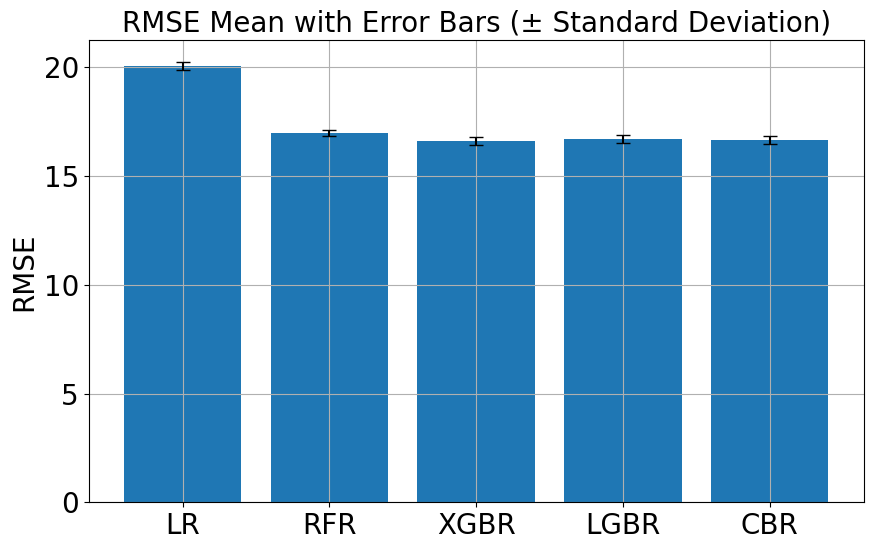

In [54]:
# 박스플롯을 사용한 RMSE 시각화
plt.figure(figsize=(10, 6))
plt.boxplot(rmse_list, labels=models.keys())
plt.title('Model Comparison with Cross-Validation (RMSE)')
plt.ylabel('RMSE')
plt.xticks()
plt.grid(True)
plt.show()

# 막대 그래프를 사용한 RMSE 평균 및 표준편차 시각화
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['RMSE Mean'], yerr=results_df['RMSE Std'], capsize=5)
plt.title('RMSE Mean with Error Bars (± Standard Deviation)')
plt.ylabel('RMSE')
plt.xticks()
plt.grid(True)
plt.show()

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000509 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 992
[LightGBM] [Info] Number of data points in the train set: 77696, number of used features: 7
[LightGBM] [Info] Start training from score 14.718501
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000909 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 993
[LightGBM] [Info] Number of data points in the train set: 77697, number of used features: 7
[LightGBM] [Info] Start training from score 14.706721
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000407 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

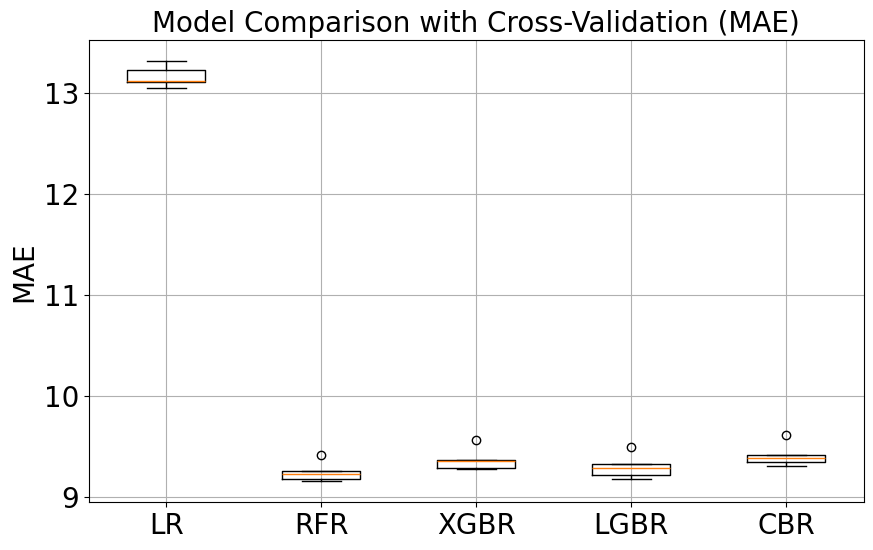

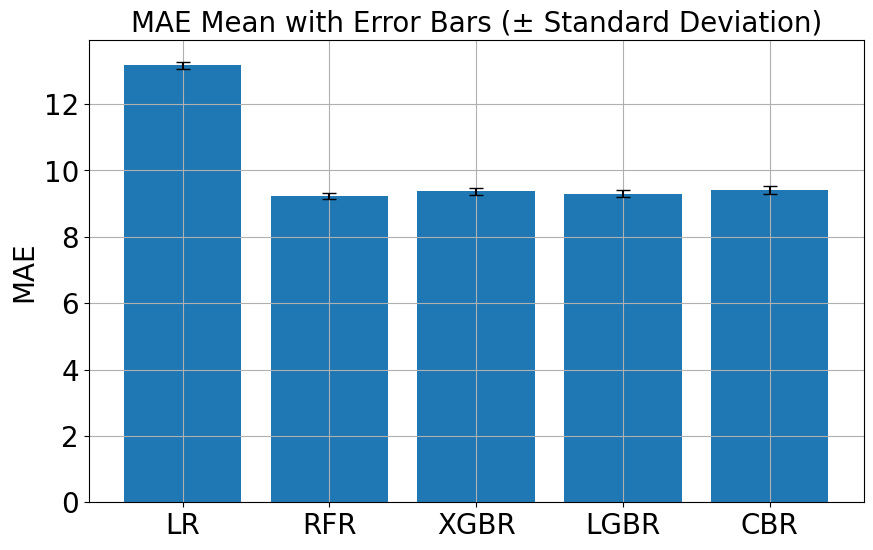

In [55]:
# 성능 평가를 위한 리스트 초기화
results = []
mae_list = []

# 각 모델에 대해 성능 평가
for model_name, model in models.items():
    # 5-fold 교차검증을 통한 MAE 계산
    mae_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    
    # 평균 및 표준편차 계산
    mae_mean = -mae_scores.mean()
    mae_std = mae_scores.std()
    
    # 결과 저장
    results.append({
        'Model': model_name,
        'MAE Mean': mae_mean,
        'MAE Std': mae_std
    })
    
    # MAE 리스트 저장 (박스플롯 시각화를 위해)
    mae_list.append(-mae_scores)

# 결과 데이터프레임 생성
results_df = pd.DataFrame(results)

# 성능 평가 결과 출력
print(results_df)

# 박스플롯을 사용한 MAE 시각화
plt.figure(figsize=(10, 6))
plt.boxplot(mae_list, labels=models.keys())
plt.title('Model Comparison with Cross-Validation (MAE)')
plt.ylabel('MAE')
plt.xticks()
plt.grid(True)
plt.show()

# 막대 그래프를 사용한 MAE 평균 및 표준편차 시각화
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['MAE Mean'], yerr=results_df['MAE Std'], capsize=5)
plt.title('MAE Mean with Error Bars (± Standard Deviation)')
plt.ylabel('MAE')
plt.xticks()
plt.grid(True)
plt.show()

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000666 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 992
[LightGBM] [Info] Number of data points in the train set: 77696, number of used features: 7
[LightGBM] [Info] Start training from score 14.718501
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000567 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 993
[LightGBM] [Info] Number of data points in the train set: 77697, number of used features: 7
[LightGBM] [Info] Start training from score 14.706721
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000407 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

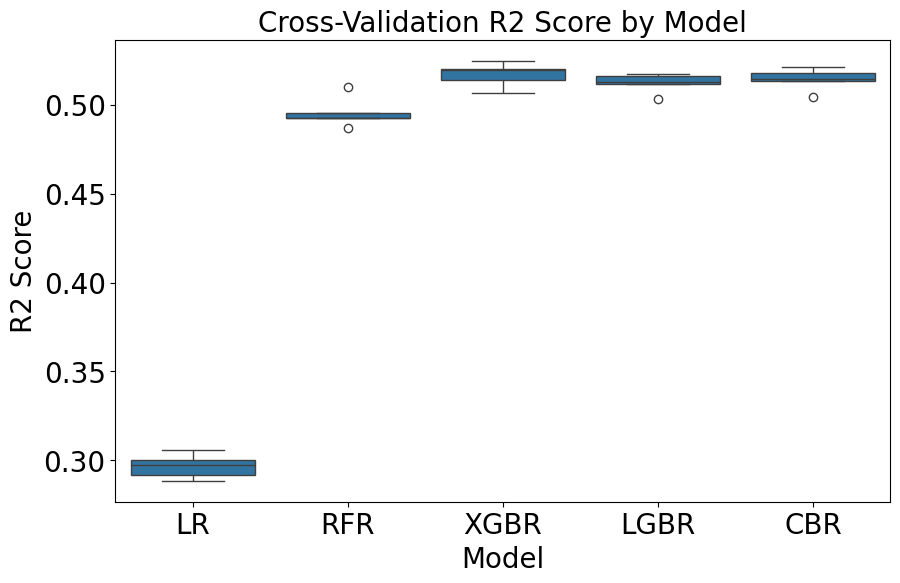

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

# 모델 성능 결과 저장 리스트 (교차 검증 R2)
cv_results = []

# 각 모델에 대해 교차 검증 수행 및 R2 스코어 수집
for model_name, model in models.items():
    # 교차 검증을 통한 R2 스코어 계산 (5-fold cross-validation)
    r2_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    
    # 모델별로 R2 스코어 저장
    for score in r2_scores:
        cv_results.append({
            'Model': model_name,
            'R2 Score': score
        })

# 결과를 데이터프레임으로 변환
cv_results_df = pd.DataFrame(cv_results)

# 박스플롯 그리기
plt.figure(figsize=(10, 6))
sns.boxplot(x='Model', y='R2 Score', data=cv_results_df)
plt.title('Cross-Validation R2 Score by Model')
plt.ylabel('R2 Score')
plt.xlabel('Model')
plt.xticks()
plt.show()

In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# 모델 성능 결과 저장 리스트
results = []

# 각 모델에 대해 성능 평가
for model_name, model in models.items():
    # 모델 훈련
    model.fit(X_train, y_train)
    
    # 예측
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # 성능 평가 (훈련 세트)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2_train = r2_score(y_train, y_train_pred)
    
    # 성능 평가 (테스트 세트)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_test = r2_score(y_test, y_test_pred)
    
    # 결과 저장
    results.append({
        'Model': model_name,
        'MAE Train': mae_train,
        'RMSE Train': rmse_train,
        'R2 Train': r2_train,
        'MAE Test': mae_test,
        'RMSE Test': rmse_test,
        'R2 Test': r2_test
    })

# 결과 데이터프레임 생성
results_df = pd.DataFrame(results)

# 성능 평가 결과 출력
results_df

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000517 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 993
[LightGBM] [Info] Number of data points in the train set: 97121, number of used features: 7
[LightGBM] [Info] Start training from score 14.727063


,Model,MAE Train,RMSE Train,R2 Train,MAE Test,RMSE Test,R2 Test
0,LR,13.165296,20.049111,0.296966,12.988137,19.703827,0.305734
1,RFR,3.396530,6.331243,0.929893,9.000692,16.661577,0.503571
2,XGBR,8.444969,15.012797,0.605807,9.178763,16.321077,0.523654
3,LGBR,9.031366,16.213144,0.540251,9.163940,16.489358,0.513781
4,CBR,8.892970,15.758480,0.565675,9.247072,16.432102,0.517152


In [58]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 결과를 저장할 리스트 초기화
train_results = []
test_results = []

for model_name, model in models.items():
    # 각 모델에 대해 cross_val_score로 교차 검증 (training 데이터)
    train_mae_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    train_rmse_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
    train_r2_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

    # 평균 및 표준편차 계산 (training 데이터)
    train_results.append({
        'Model': model_name,
        'MAE Mean': -train_mae_scores.mean(),
        'MAE Std': train_mae_scores.std(),
        'RMSE Mean': -train_rmse_scores.mean(),
        'RMSE Std': train_rmse_scores.std(),
        'R2 Mean': train_r2_scores.mean(),
        'R2 Std': train_r2_scores.std()
    })
    
    # test 데이터에 대한 예측 수행
    model.fit(X_train, y_train)  # 모델 학습
    y_pred = model.predict(X_test)
    
    test_mae = mean_absolute_error(y_test, y_pred)
    test_rmse = mean_squared_error(y_test, y_pred, squared=False)
    test_r2 = r2_score(y_test, y_pred)

    # test 데이터에 대한 MAE, RMSE, R2 점수의 표준편차 계산을 위해 여러 번 테스트
    test_mae_scores = []
    test_rmse_scores = []
    test_r2_scores = []
    
    for _ in range(10):  # 예시로 10번 반복
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        test_mae_scores.append(mean_absolute_error(y_test, y_pred))
        test_rmse_scores.append(mean_squared_error(y_test, y_pred, squared=False))
        test_r2_scores.append(r2_score(y_test, y_pred))

    # test 결과 저장
    test_results.append({
        'Model': model_name,
        'MAE Mean': np.mean(test_mae_scores),
        'MAE Std': np.std(test_mae_scores),
        'RMSE Mean': np.mean(test_rmse_scores),
        'RMSE Std': np.std(test_rmse_scores),
        'R2 Mean': np.mean(test_r2_scores),
        'R2 Std': np.std(test_r2_scores)
    })

c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will b

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000553 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 992
[LightGBM] [Info] Number of data points in the train set: 77696, number of used features: 7
[LightGBM] [Info] Start training from score 14.718501
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000575 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 993
[LightGBM] [Info] Number of data points in the train set: 77697, number of used features: 7
[LightGBM] [Info] Start training from score 14.706721
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000815 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000519 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 993
[LightGBM] [Info] Number of data points in the train set: 97121, number of used features: 7
[LightGBM] [Info] Start training from score 14.727063
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000611 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 993
[LightGBM] [Info] Number of data points in the train set: 97121, number of used features: 7
[LightGBM] [Info] Start training from score 14.727063


c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000497 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 993
[LightGBM] [Info] Number of data points in the train set: 97121, number of used features: 7
[LightGBM] [Info] Start training from score 14.727063
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000560 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 993
[LightGBM] [Info] Number of data points in the train set: 97121, number of used features: 7
[LightGBM] [Info] Start training from score 14.727063


c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000598 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 993
[LightGBM] [Info] Number of data points in the train set: 97121, number of used features: 7
[LightGBM] [Info] Start training from score 14.727063
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000484 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 993
[LightGBM] [Info] Number of data points in the train set: 97121, number of used features: 7
[LightGBM] [Info] Start training from score 14.727063


c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000550 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 993
[LightGBM] [Info] Number of data points in the train set: 97121, number of used features: 7
[LightGBM] [Info] Start training from score 14.727063
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000587 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 993
[LightGBM] [Info] Number of data points in the train set: 97121, number of used features: 7
[LightGBM] [Info] Start training from score 14.727063


c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000506 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 993
[LightGBM] [Info] Number of data points in the train set: 97121, number of used features: 7
[LightGBM] [Info] Start training from score 14.727063
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000508 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 993
[LightGBM] [Info] Number of data points in the train set: 97121, number of used features: 7
[LightGBM] [Info] Start training from score 14.727063


c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will b

In [59]:
# 결과를 DataFrame으로 변환
train_results_df = pd.DataFrame(train_results)
test_results_df = pd.DataFrame(test_results)

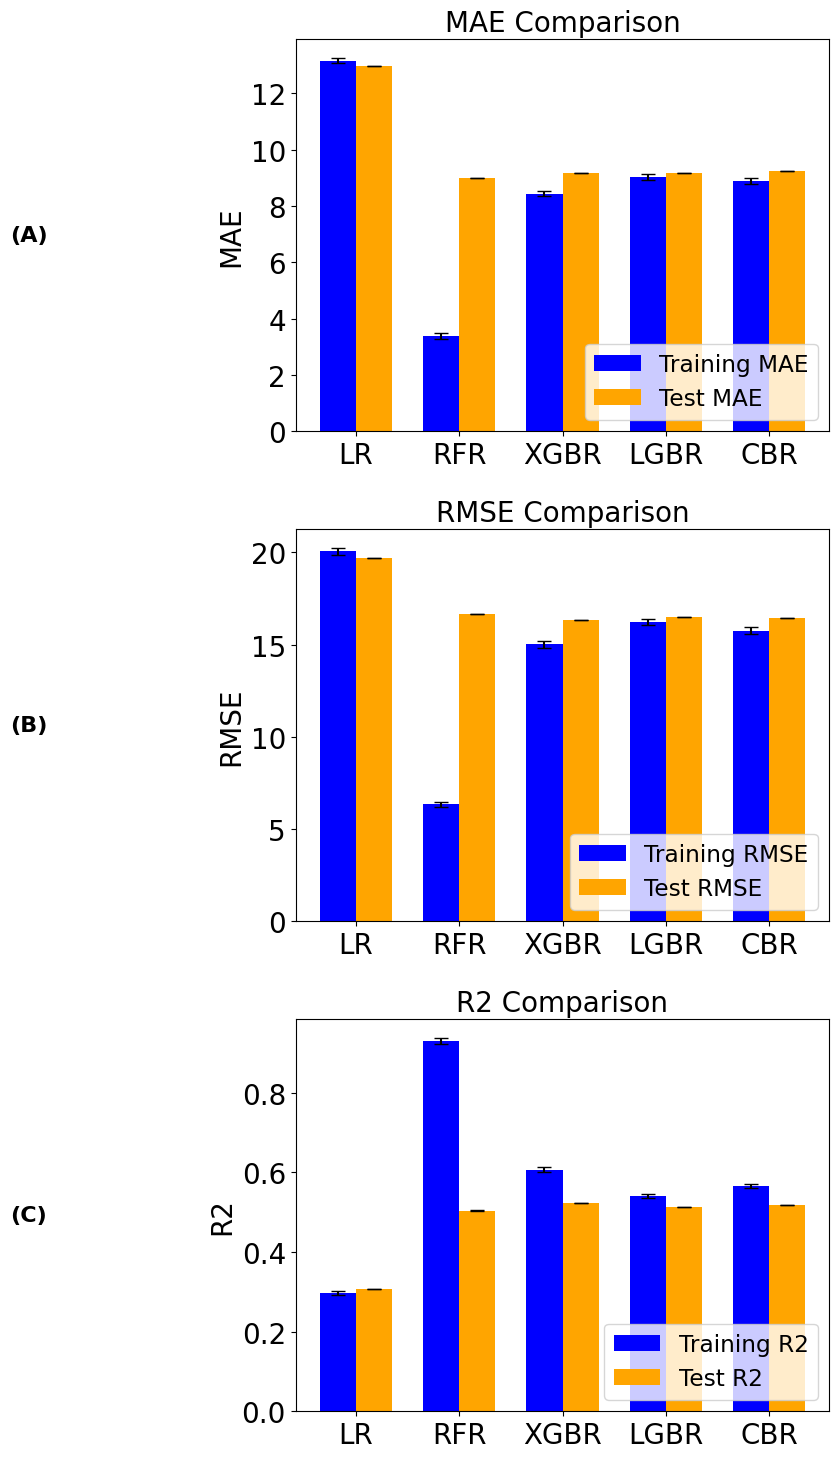

In [64]:
# 막대 그래프를 사용한 성능 비교 시각화
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# 각 그래프에 A, B, C 텍스트 추가
axs[0].text(-0.5, 0.5, '(A)', transform=axs[0].transAxes, fontsize=16, fontweight='bold', va='center', ha='center')
axs[1].text(-0.5, 0.5, '(B)', transform=axs[1].transAxes, fontsize=16, fontweight='bold', va='center', ha='center')
axs[2].text(-0.5, 0.5, '(C)', transform=axs[2].transAxes, fontsize=16, fontweight='bold', va='center', ha='center')

# MAE 비교 (오류 막대 포함)
bar_width = 0.35  # 막대 너비
index = np.arange(len(train_results_df['Model']))  # 각 모델의 인덱스

axs[0].bar(index - bar_width/2, results_df['MAE Train'], bar_width, 
            yerr=train_results_df['MAE Std'], capsize=5, color='blue', label='Training MAE')
axs[0].bar(index + bar_width/2, results_df['MAE Test'], bar_width, 
            yerr=test_results_df['MAE Std'], capsize=5, color='orange', label='Test MAE')
axs[0].set_title('MAE Comparison')
axs[0].set_ylabel('MAE')
axs[0].set_xticks(index)
axs[0].set_xticklabels(train_results_df['Model'])
axs[0].legend(loc='lower right', fontsize='small')

# RMSE 비교 (오류 막대 포함)
axs[1].bar(index - bar_width/2, results_df['RMSE Train'], bar_width, 
            yerr=train_results_df['RMSE Std'], capsize=5, color='blue', label='Training RMSE')
axs[1].bar(index + bar_width/2, results_df['RMSE Test'], bar_width, 
            yerr=test_results_df['RMSE Std'], capsize=5, color='orange', label='Test RMSE')
axs[1].set_title('RMSE Comparison')
axs[1].set_ylabel('RMSE')
axs[1].set_xticks(index)
axs[1].set_xticklabels(train_results_df['Model'])
axs[1].legend(loc='lower right', fontsize='small')

# R2 비교 (오류 막대 포함)
axs[2].bar(index - bar_width/2, results_df['R2 Train'], bar_width, 
            yerr=train_results_df['R2 Std'], capsize=5, color='blue', label='Training R2')
axs[2].bar(index + bar_width/2, results_df['R2 Test'], bar_width, 
            yerr=test_results_df['R2 Std'], capsize=5, color='orange', label='Test R2')
axs[2].set_title('R2 Comparison')
axs[2].set_ylabel('R2')
axs[2].set_xticks(index)
axs[2].set_xticklabels(train_results_df['Model'])
axs[2].legend(loc='lower right', fontsize='small')

plt.tight_layout()
plt.show()

### 4. 하이퍼 파라미터 튜닝

- Genetic Algorithm

- lightGBM after tuning

In [26]:
import joblib

# 모델을 .pkl 파일로 저장
# joblib.dump(final_model, 'final_model.pkl')

['final_model.pkl']

In [27]:
# 저장된 모델을 로드하는 방법
# loaded_model = joblib.load('final_model.pkl')

In [ ]:
# 모델을 .txt 파일로 저장
# final_model.booster_.save_model('final_model.txt')

# 저장된 모델을 로드하는 방법
# loaded_model = lgb.Booster(model_file='final_model.txt')